# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [123]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(query_url).json()
        print(weather_response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response['coord']['lat']
        city_lng = weather_response['coord']['lon']
        city_max_temp = weather_response['main']['temp_max']
        city_humidity = weather_response['main']['humidity']
        city_clouds = weather_response['clouds']['all']
        city_wind = weather_response['wind']['speed']
        city_country = weather_response['sys']['country']
        city_date = weather_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | urangan
{'coord': {'lon': 152.9, 'lat': -25.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 24.03, 'feels_like': 24.71, 'temp_min': 24.03, 'temp_max': 24.03, 'pressure': 1007, 'humidity': 85, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.87, 'deg': 153, 'gust': 11.37}, 'rain': {'1h': 0.65}, 'clouds': {'all': 100}, 'dt': 1734203602, 'sys': {'country': 'AU', 'sunrise': 1734202354, 'sunset': 1734251674}, 'timezone': 36000, 'id': 2145392, 'name': 'Urangan', 'cod': 200}
Processing Record 2 of Set 1 | thompson
{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -11.91, 'feels_like': -11.91, 'temp_min': -11.91, 'temp_max': -11.91, 'pressure': 1017, 'humidity': 85, 'sea_l

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urangan,-25.3000,152.9000,24.03,85,100,6.87,AU,1734203602
1,thompson,55.7435,-97.8558,-11.91,85,100,0.00,CA,1734203603
2,arta,39.1606,20.9853,13.27,94,100,2.42,GR,1734203320
3,mitu,1.1983,-70.1733,32.02,48,17,1.57,CO,1734203512
4,lihue,21.9789,-159.3672,24.77,78,75,7.72,US,1734203606


In [124]:
# Export the City_Data into a csv
# Ensure the directory 'output_data' exists
output_dir = "output_data"


# Export the city_data_df DataFrame to a CSV file with index labeled as "City_ID"
city_data_df.to_csv(f"{output_dir}/cities.csv", index=True, index_label="City_ID")


In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urangan,-25.3000,152.9000,24.03,85,100,6.87,AU,1734203602
1,thompson,55.7435,-97.8558,-11.91,85,100,0.00,CA,1734203603
2,arta,39.1606,20.9853,13.27,94,100,2.42,GR,1734203320
3,mitu,1.1983,-70.1733,32.02,48,17,1.57,CO,1734203512
4,lihue,21.9789,-159.3672,24.77,78,75,7.72,US,1734203606


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

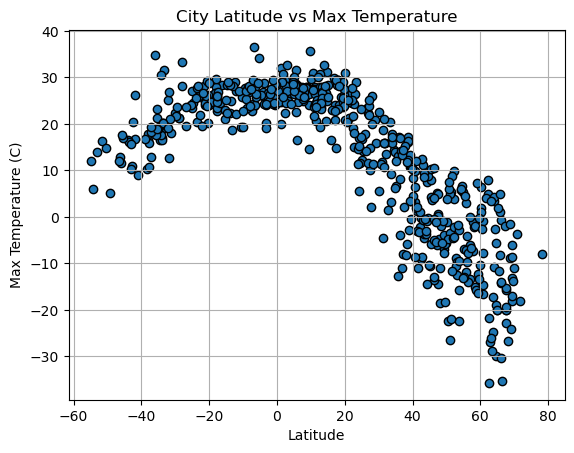

In [57]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Max Temperature")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

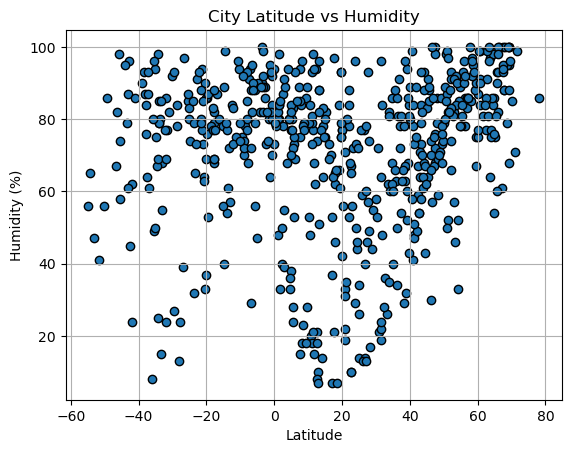

In [55]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

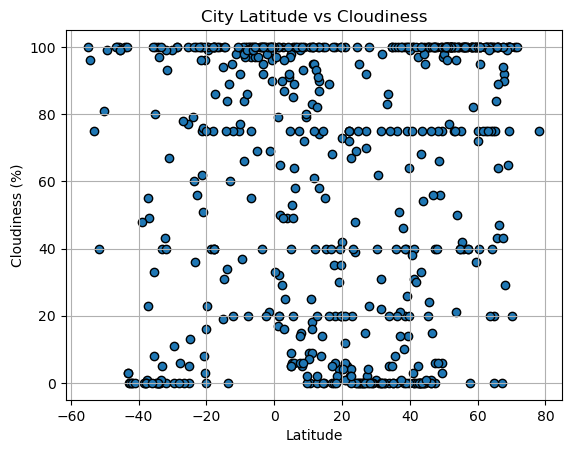

In [50]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

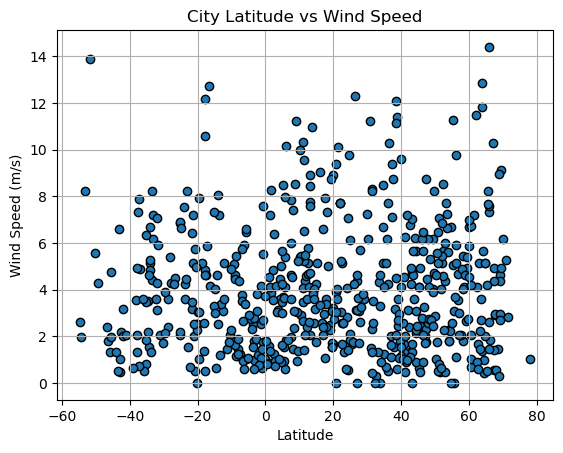

In [54]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    plt.scatter(x, y)
    plt.plot(x, regression_line, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()
    print(f"Regression Line: y = {slope:.2f}x + {intercept:.2f}, r^2 = {r_value**2:.2f}")

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,-11.91,85,100,0.00,CA,1734203603
2,arta,39.1606,20.9853,13.27,94,100,2.42,GR,1734203320
3,mitu,1.1983,-70.1733,32.02,48,17,1.57,CO,1734203512
4,lihue,21.9789,-159.3672,24.77,78,75,7.72,US,1734203606
6,vadso,70.0744,29.7487,-10.91,85,20,6.17,NO,1734203608


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urangan,-25.3000,152.9000,24.03,85,100,6.87,AU,1734203602
5,ancud,-41.8697,-73.8203,16.73,62,0,3.18,CL,1734203607
7,punta arenas,-53.1500,-70.9167,14.06,47,75,8.23,CL,1734203329
9,adamstown,-25.0660,-130.1015,23.47,80,5,6.89,PN,1734203611
13,puerto natales,-51.7236,-72.4875,16.25,41,40,13.89,CL,1734203615


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7761906922299142


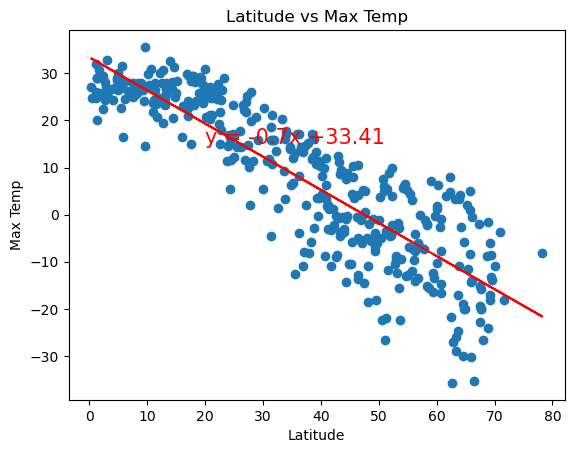

In [135]:
# Linear regression on Northern Hemisphere

from scipy import stats

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.47072711846125653


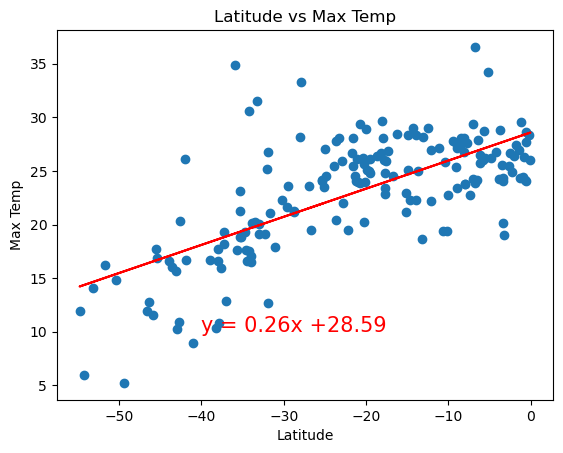

In [134]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The negative slope of the northern hemisphere plot indicates that as latitude increases, the maximum temperature decreases. And the r^2-value of 0.7761 suggests a strong negative correlation between latitude and maximum temperature in the Northern Hemisphere. For the southern hemisphere, the positive slope indicates that as latitude increases (moving closer to the equator from the Southern Hemisphere), the maximum temperature increases. The r^2-value of 0.4707 suggests a moderate positive correlation between latitude and maximum temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.14002854462082484


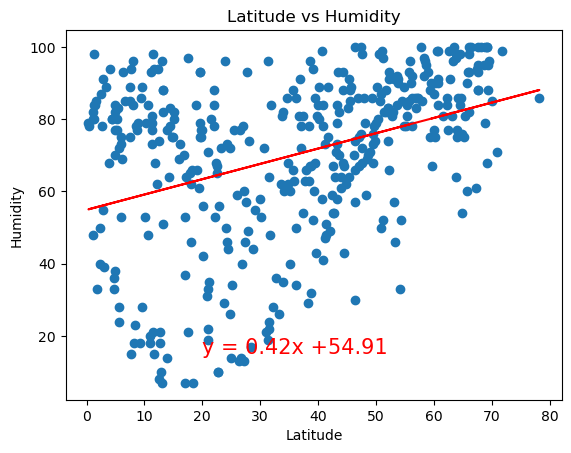

In [126]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.06327611717124525


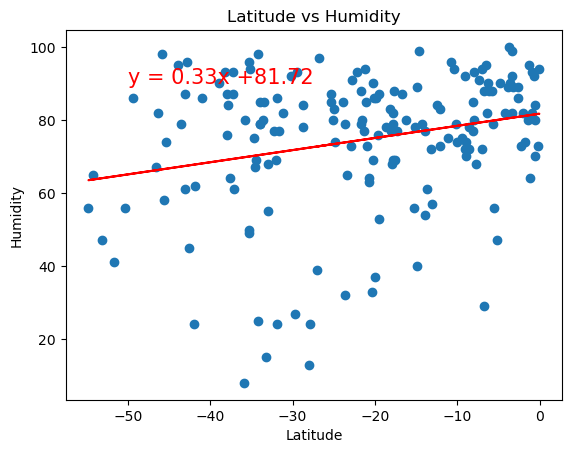

In [127]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The scatter points are very wide apart indicating that there are factors other than latitude that are influencing humidity. This weak correlatioin shows that latitude alone is not a reliable predictor of humidity in the northern hemisphere. The southern hemisphere also shows a very weak correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.07561440782674642


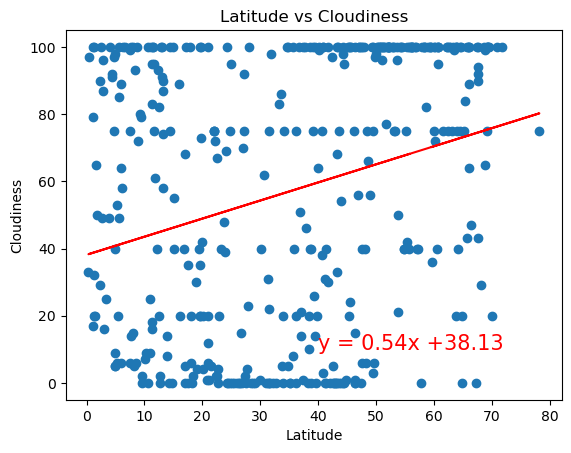

In [128]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.14484584096468459


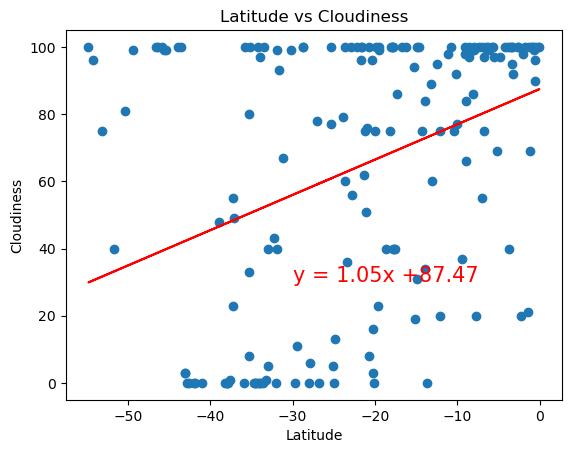

In [129]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The scatter of points is very wide, with cloudiness values ranging from 0 to 100 at nearly every latitude. This high variability highlights that cloudiness does not depend strongly on latitude in the Northern Hemisphere. the very low r^2-value suggests that cloudiness is not just influenced by latitude alone. This is also implied in the Southern hemisphere. The regression line in the Southern hmisphere shows a slightly stronger relationship compared to the Northern Hemisphere, indicating that regions closer to the equator in the Southern Hemisphere might experience less cloudiness on average.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 2.5303388713096416e-06


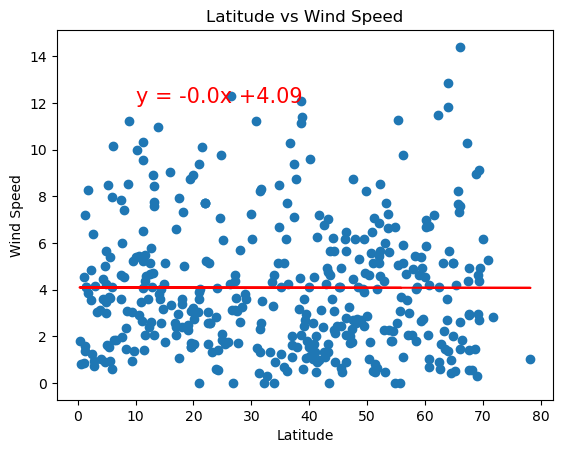

In [131]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.0175045221850542


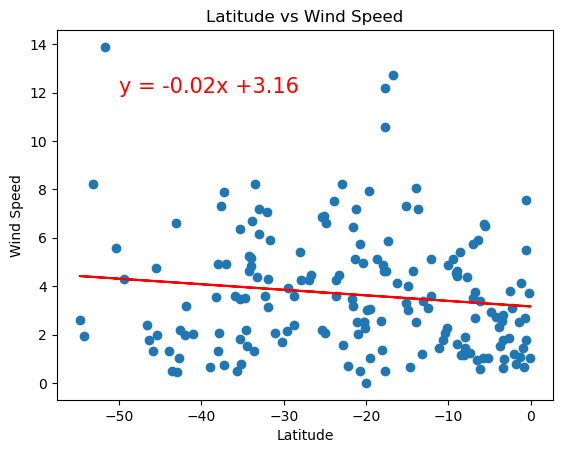

In [133]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The slope being zero indicates that latitude has no measurable effect on wind speed in the Northern hemisphere. The r^2-value also suggests that wind speed is idependent of latitude in the Northern hemisphere. The scatter points for both hemispheres show an exteremely weak or no correlation between latitude and wind speed. 